## Exploratory Data Analysis of Real Estate Listings in Manhattan  



### Introduction  

Using Python's Scrapy package, the goal of this project was to conduct an exploratory data analysis of on residential real estate lisitngs in Manhattan. The EDA aims to answer three questions regarding real-estate listings:  

- What are some of the general trends in real-estate listings in Manhattan? 
- What factors can affect the price of a Manhattan listing?   
- How affordable and financially feasible is purchasing resdiential real-estate for the average New Yorker?  

The data for this project was scrapped from Realtor.com and consists of 1663 individual listings containing information on the street address, price, number of bath & bedrooms, property type, and square footage. 

In [2]:
#loading libraries and dataset 
import pandas as pd 
import numpy as np  
from scipy import stats  
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline 

plt.style.use('ggplot') 
df = pd.read_csv("real_estate_data.csv") 
df = df.drop("Unnamed: 0", axis = 1)  
df['property_type'] = df['property_type'].str.replace('Condop', 'Condo').str.replace('Townhome','Townhouse')
df['total_rooms'] =  df['baths'] + df['beds'] 
sns.set_style("whitegrid")

### Part I: Overview of the Data 

Text(0, 0.5, 'Counts')

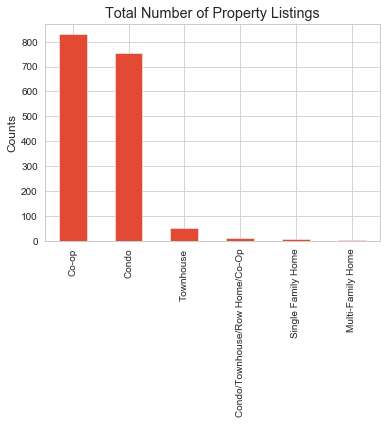

In [9]:
df['property_type'].value_counts().plot.bar() 
plt.title("Total Number of Property Listings") 
plt.ylabel("Counts")

The bar plot above shows the total number of property types in the data set. Overall, the two predominant property types in Manhattan appear to be Co-ops and Condos. Townhouses, Single Family Homes, Multi Family Homes, and hybrid properties collectively account for less than 10% of the total number of listings. 

Text(0, 0.5, '')

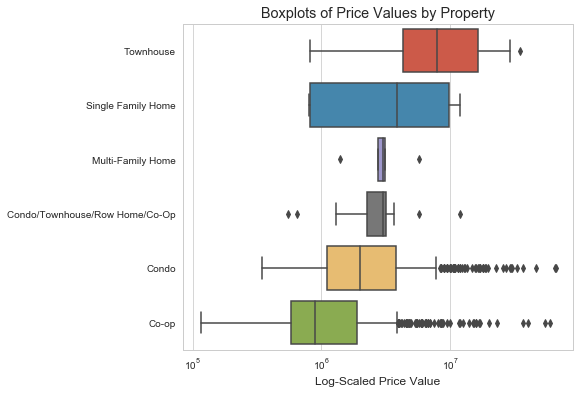

In [10]:
f, ax = plt.subplots(figsize=(7, 6))
m_order = df.groupby(by=['property_type'])['price'].median().sort_values(ascending=False).index
sns.set_style("whitegrid")
ax =sns.boxplot(x="price", y="property_type", data=df, order = m_order ) 
ax.set_xscale('log')
ax.set_title('Boxplots of Price Values by Property')
ax.set_xlabel('Log-Scaled Price Value')
ax.set_ylabel('')

The set of boxplots above depict the listing prices for residencies across several property types. Townhouses have the largest overall listing price while condos and co-ops have the lowest overall prices.

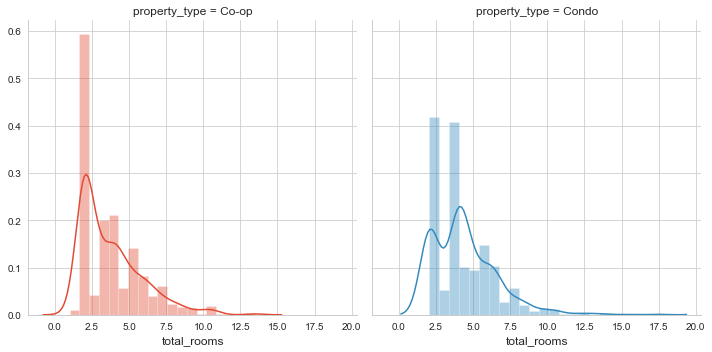

In [14]:
major_props = ['Co-op', 'Condo']
df_filt = df[df['property_type'].isin(major_props)] 
plotgrid = sns.FacetGrid(df_filt, col = "property_type", hue = "property_type", height = 5) 
plotgrid.map(sns.distplot, 'total_rooms') 


The following two histograms show the distrubtion of the total number of rooms in a listing between condos and co-ops. Overall the number of rooms clusters around 2-4 total rooms. 

C:\Users\bpj25\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, '')

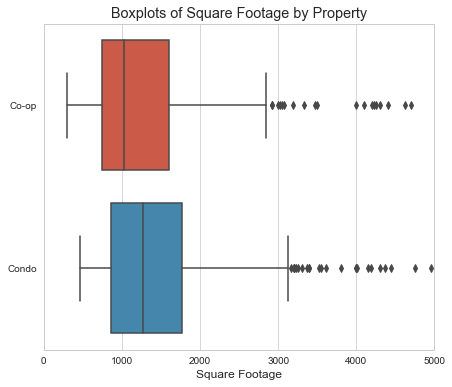

In [30]:
#sqft by house type 
df_sqft = df_filt.dropna(axis = 0, how = 'any') 
sqft = df_sqft['sqft'].str.replace(',','')
df_sqft['sqft'] = [int(x) for x in sqft]

f, ax = plt.subplots(figsize=(7, 6))
sns.set_style("whitegrid")
ax =sns.boxplot(x="sqft", y="property_type", data=df_sqft) 
ax.set_title('Boxplots of Square Footage by Property')
ax.set(xlim = (0, 5000))
ax.set_xlabel("Square Footage")
ax.set_ylabel('')


### Part 2:  Factors Affecting Listing Price 

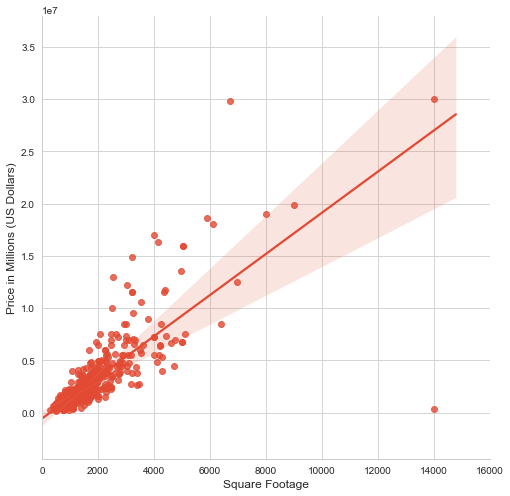

In [76]:
ax = sns.lmplot('sqft', 'price', df_sqft, height = 7)
ax.set(xlim = (0,16000))
ax.set_axis_labels('Square Footage', 'Price in Millions (US Dollars)')


The following graph is a plot of square footage against listing price modelled also with a regression line. The regression line shows a strong correlation near the start, but begins to show significant errors as the square footage increases. 

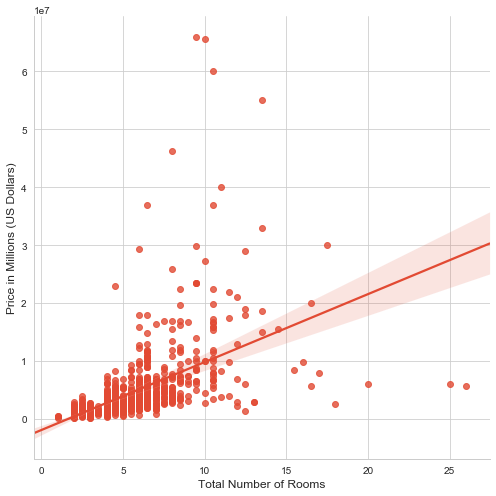

In [40]:
ax = sns.lmplot('total_rooms', 'price', df, height =7) 
ax.set_axis_labels('Total Number of Rooms', 'Price in Millions (US Dollars)')

The following graph depcits the total number of rooms in a listing plotted against the listing price. A linear model was used to visualize the relationship between room number and price. From this graph, it appears that there is a positive correlation between the number of rooms and listing price. 

In [46]:
corr_table = df_sqft.corr(method = 'pearson') 
corr_table[['price']] 

,price
baths,0.769648
beds,0.663955
price,1.000000
sqft,0.807260
year_built,0.049267
zipcode,-0.015051
high_payment,1.000000
low_payment,1.000000
low_monthly,1.000000
high_monthly,1.000000


In order to examine the correlation between variables, Pearson's correlation was used to examine the correlation on between the all the variables and price. Of the variables listed in the table, price was strongly correlated with square footage and the number of rooms; indicating that for listings in Manhattan, square footage and the number of rooms may useful metrics for predicting listing price. 

### Part 3: Finances of Purchasing

Text(0.5, 1.0, 'Boxplots Comparing Mortgage Rates')

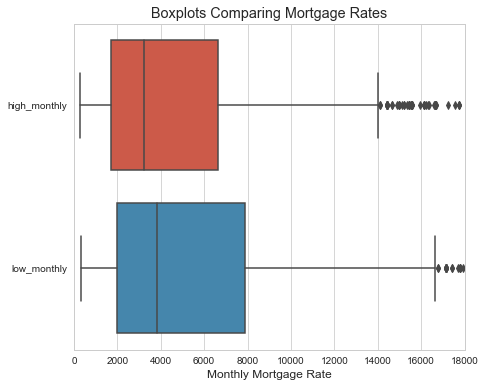

In [3]:
df_payments = df[['high_monthly', 'low_monthly']]
df_mort = df_payments.melt(value_vars = ['high_monthly', 'low_monthly'], value_name = 'monthly_mortgage')   
f, ax = plt.subplots(figsize=(7, 6))
ax = sns.boxplot(x="monthly_mortgage", y="variable", data=df_mort)
ax.set(xlim=(0, 18000))
ax.set_ylabel('')
ax.set_xlabel('Monthly Mortgage Rate(30 year Mortgage)')
ax.set_title('Boxplots Comparing Mortgage Rates')

The pair of boxplots above show the distrubtions of monthly mortgages. The mortgages were calculated by finding the difference between the listing price and down payment dividing three hundred and sixty, which is the number of months in thirty years. The red plot shows the monthly mortgage after a twenty percent down payment, and the blue plot shows the monthly mortgage after a five percent down payment. 

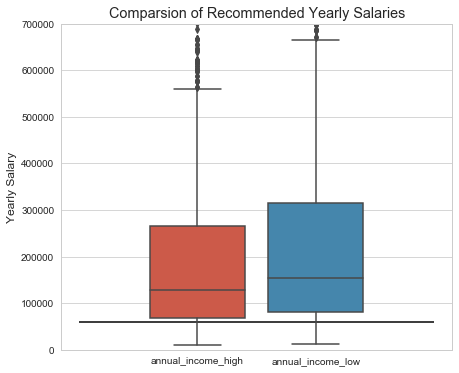

In [9]:
df_salary = df[['annual_income_high', 'annual_income_low']] 
df_sals = df_salary.melt(value_vars= ['annual_income_high', 'annual_income_low'], value_name = 'annual_income')
f, ax = plt.subplots(figsize=(7, 6))
ax = sns.boxplot(x="variable", y="annual_income", data=df_sals)
ax.set(ylim=(0,700000))
ax.set_xlabel("")
ax.set_ylabel('Yearly Salary') 
ax.set_title('Comparsion of Recommended Yearly Salaries')
ax.hlines(60000, -1, 2)

The boxplots above show the distribution of recommended yearly salaries based on the potential monthly mortgage of a listing. The recommended salary was determined by calculating a salary in which 30 percent of the annual income goes towards the monthly mortgage payments. The red plot shows the distribution of salaries if a listing had a twenty percent down payment, and the blue plot shows the distribution of salaries if a listing had a five percent down payment. The horizontal line below the twenty-fifth percentile of each plot is the median household income of Manhattan residents in 2018, which was about $60,000.

### Conclusions & Future Steps

From the scrapped real-estate data, the following patterns observed in Manhattan residential real-estate: 
- A large portion of listings consist mainly of Co-Op and Condos 
- Some overlaps in the prices and size of Co-Op and Condo listings 
- Very few large residential listings in Manhattan 
- Square footage and the number of rooms were positively correlated with the price of a listing 
- Most of the residential real-estate listings are potentially unaffordable to the average New York City resident

The data gathered for this analysis represents less than a third of the total number of Manhattan listings avaiable on Realtor; however, due to time-constraints and technicial issues, the EDA was conducted with just the data on hand, so the estimates do not offer a full & comprehensize overview on Manhattan residential real-estate. Furthermore, the data do not indicate how prices have shifted as a result of the COVID-19 pandemic, and the data also do not look towards prices in areas surrounding Manhattan like New Jersey, Upstate New York, and Queens. Therefore, a future iteration of the project would broaden the scope real-estate listings & make comparissons between historical pricing data.  

